# ❤️‍🩹 Predicting Heart Disease using Machine Learning
This notebook will utilize various machine learning and data science libraries to attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.


## 1. Problem Definition
* Given medical attributes about a patient, can we predict whether or not they have heart disease?

## 2. Data
* The data that will be used in this notenook comes from the Heart Disease Classification Dataset on Kaggle: https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation
* The goal of this project is to train a model that can produce at least a 95% accuracy score at predicting whether or not a patient has heart disease.

## 4. Features
* Here are the features that are within the dataset:
> - age: Displays the age of the individual.

> - sex: Displays the gender of the individual using the following format : 1 = male 0 = female

> - cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format : 0 = typical angina 1 = atypical angina 2 = non — anginal pain 3 = asymptotic

> - trestbps- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.

> - chol- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

> - fbs- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes

> - restecg- Resting ECG : displays resting electrocardiographic results 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy

> - thalach- Max heart rate achieved : displays the max heart rate achieved by an individual.

> - exang- Exercise induced angina : 1 = yes 0 = no

> - oldpeak- ST depression induced by exercise relative to rest: displays the value which is an integer or float.

> - slope- Slope of the peak exercise ST segment : 0 = upsloping: better heart rate with excercise (uncommon) 1 = flat: minimal change (typical healthy heart) 2 = downsloping: signs of unhealthy heart

> - ca- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

> - thal : Displays the thalassemia : 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising

> - target : Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = no

### Import the neccessary tools
We are going to use pandas, numpy, matplotlib, and seaborn for data analysis and manipulation as well as numerous tools from scikit-learn for modeling.

In [78]:
# Libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluation metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

### Load in the data

In [3]:
# Load in dataset using pandas
df = pd.read_csv('heart-disease.csv')

# Check the first 5 rows of the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Exploration Analysis
The goal of this step is to find out more about the data we have.

1. What kind of data are we working with?
2. What is missing from the data?
3. Does the data contain any outliers?
4. Do we need to add, change, or remove any features from the data?

In [4]:
# Check out the target variable
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

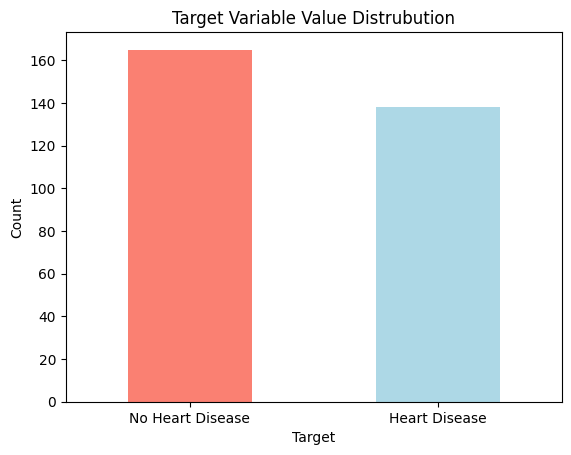

In [25]:
# Visualize the target variable with a bar chart
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Target Variable Value Distrubution')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'], rotation=0)
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

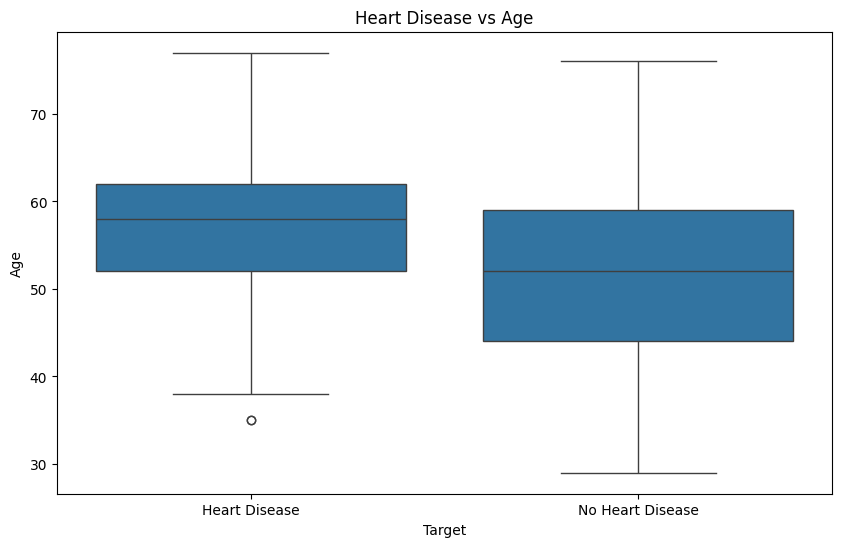

In [33]:
# Plot the target variable vs the age feature with a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=df)
plt.title('Heart Disease vs Age')
plt.xticks(ticks=[0, 1], labels=['Heart Disease', 'No Heart Disease'])
plt.xlabel('Target')
plt.ylabel('Age')
plt.show()

In [39]:
# Print out some values to compare to the box plot above
df[df['target'] == 0]['age'].median(), df[df['target'] == 1]['age'].median(), df[df['target'] == 0]['age'].max(), df[df['target'] == 1]['age'].max(), df[df['target'] == 0]['age'].min(), df[df['target'] == 1]['age'].min()

(58.0, 52.0, 77, 76, 35, 29)

In [45]:
# Take a look at some of the summary stats for the features
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0, 0.5, 'Max Heart Rate')

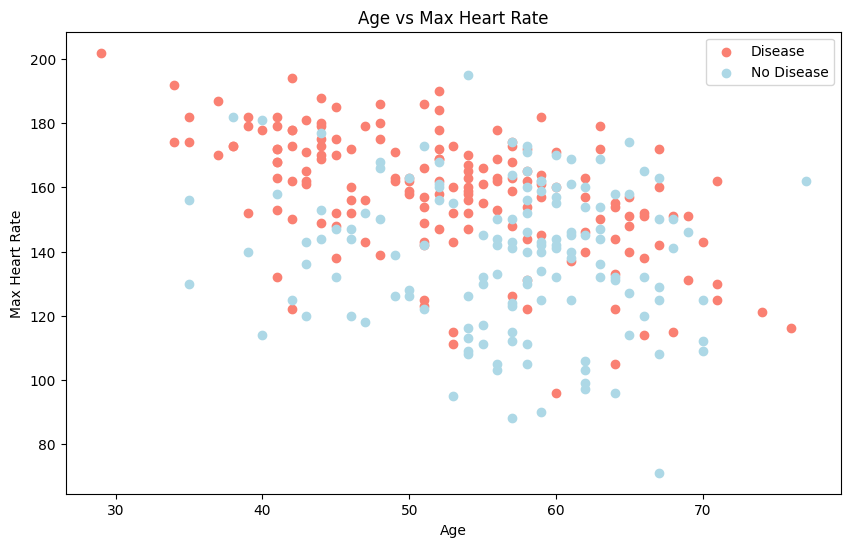

In [56]:
# Compare the age variable to thalach (max heart rate) using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], color="salmon")
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], color="lightblue")
plt.title("Age vs Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate")

In [46]:
# Check the value counts for the sex variable
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [50]:
# Compare the target variable to the sex variable
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


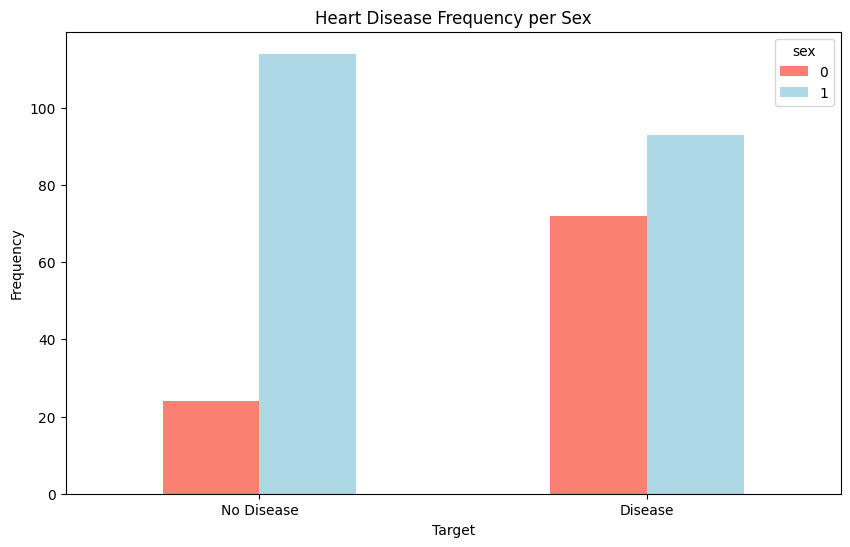

In [55]:
# Create a plot of the crosstab
pd.crosstab(df['target'], df['sex']).plot(kind='bar', color=['salmon', 'lightblue'], figsize=(10, 6))
plt.title('Heart Disease Frequency per Sex')
plt.xticks(ticks=[0, 1], labels=['No Disease', 'Disease'], rotation=0)
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

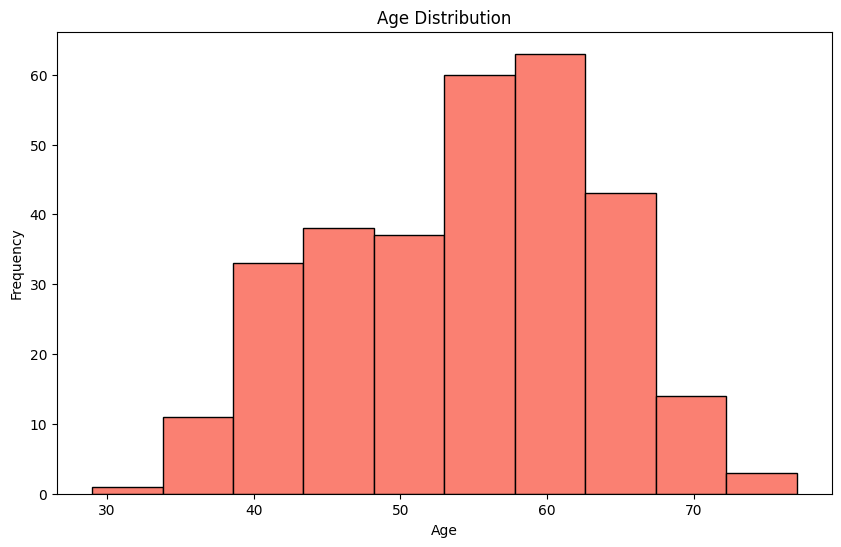

In [58]:
# Plot the distribution of Age using a histogram
df['age'].plot(kind='hist', color='salmon', edgecolor='Black', figsize=(10, 6))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [59]:
# Crosstab the target varibale with cp (chest pain)
pd.crosstab(df['target'], df['cp'])

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


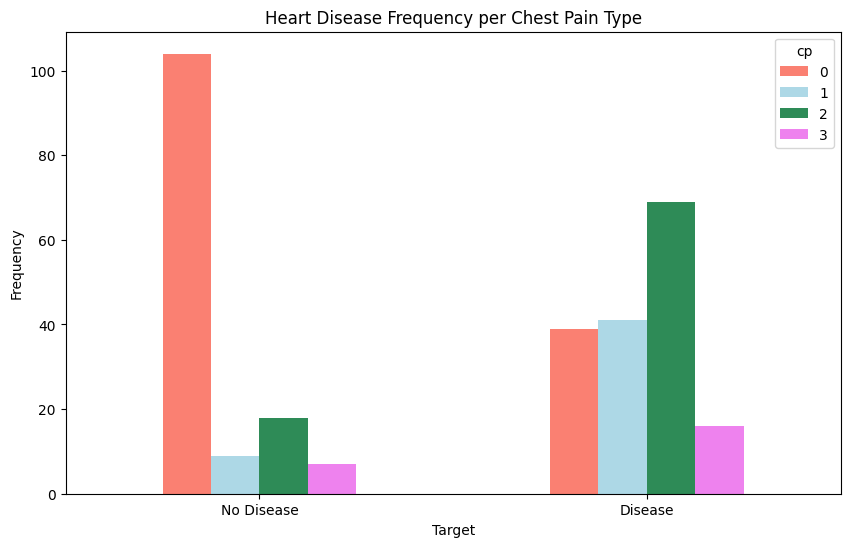

In [61]:
# Create a plot of the crosstab
pd.crosstab(df['target'], df['cp']).plot(kind='bar', color=['salmon', 'lightblue', 'seagreen', 'violet'], figsize=(10, 6))
plt.title('Heart Disease Frequency per Chest Pain Type')
plt.xticks(ticks=[0, 1], labels=['No Disease', 'Disease'], rotation=0)
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

In [62]:
# Create a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


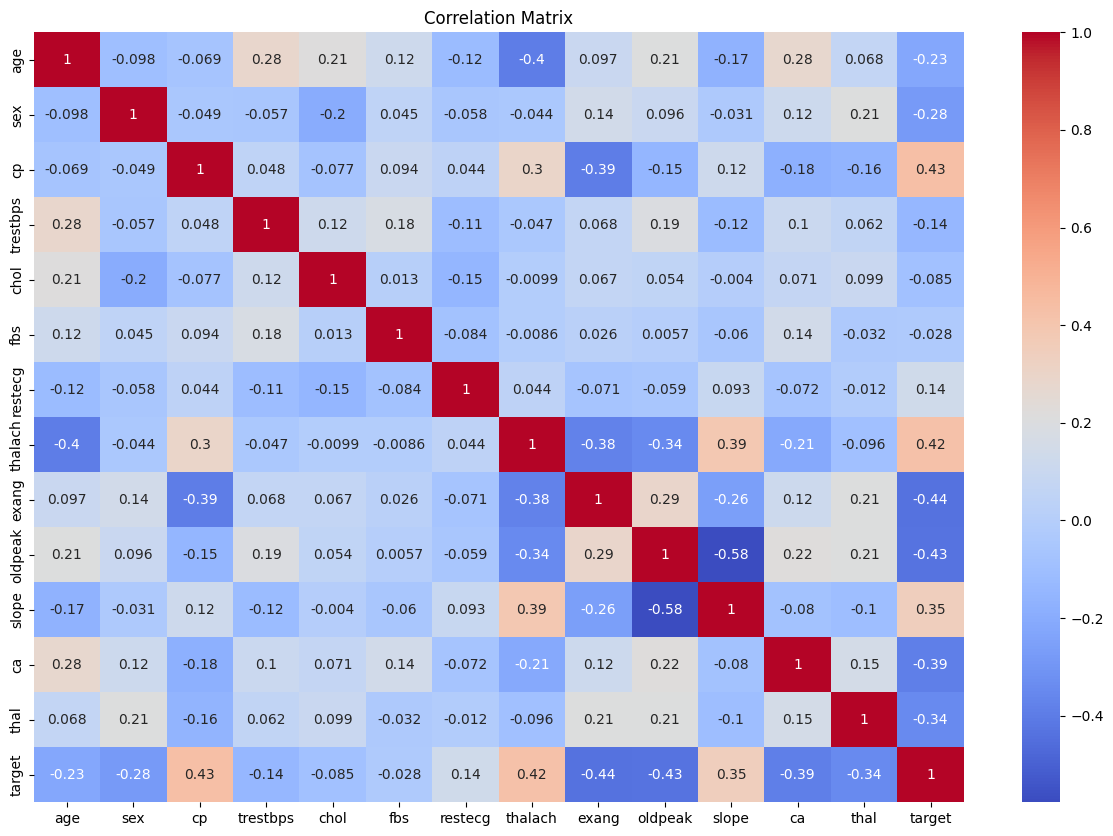

In [63]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [70]:
# Check for missing vcalues
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Modeling
Now that we have finishex exploring the data, we can begin the modeling stage

In [64]:
# Print out the data so we can have a reference to it
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [68]:
# Split the data into X and y
X = df.drop('target', axis=1)
y = df['target']

X.head(), y.head()

(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 
    ca  thal  
 0   0     1  
 1   0     2  
 2   0     2  
 3   0     2  
 4   0     2  ,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64)

In [69]:
# Split the data into training and test sets

# Set the random seed
np.random.seed(42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

Now that the data is split into training and testing sets we can begin creating and training models

In [72]:
# Put the models into a dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = accuracy_score(y_test, model.predict(X_test))
    return model_scores

In [73]:
# Fit and score the models
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

c:\Users\jkren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918,
 'K-Nearest Neighbors': 0.6885245901639344}

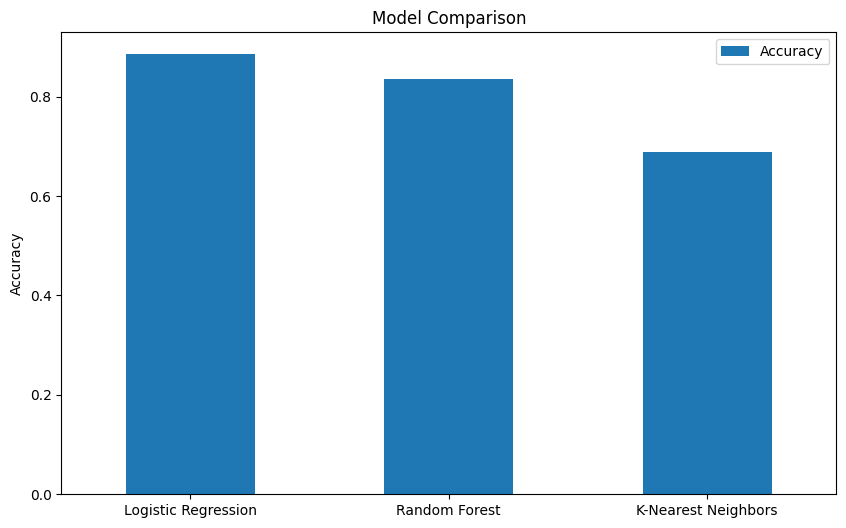

In [76]:
# Create a DataFrame of the model scores
model_scores_df = pd.DataFrame(model_scores, index=['Accuracy'])

model_scores_df.T.plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)
plt.show()

Now that we have got three baseline models, let's see if we can improve them at all by tuning each models hyperparameters

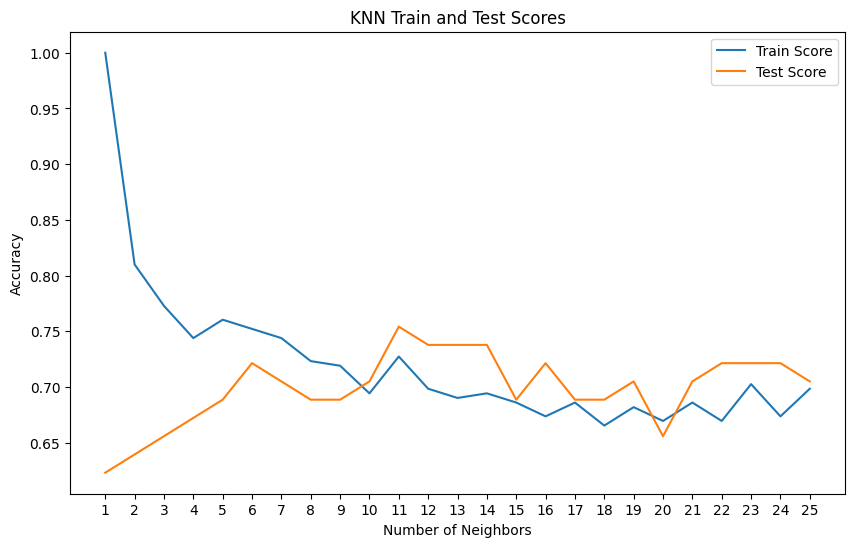

In [77]:
# Try to improve the KNN model

# Create a list of scores
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 26)

# Set up the KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

# Plot the train and test scores
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_scores, label='Train Score')
plt.plot(neighbors, test_scores, label='Test Score')
plt.title('KNN Train and Test Scores')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(neighbors)
plt.show()

In [79]:
# Use RandomizedSearchCV to tune Logistic Regression Model

# Create a hyperparameter grid for Logistic Regression
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

# Set up the RandomizedSearchCV
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=2)

# Fit the RandomizedSearchCV model
rs_log_reg.fit(X_train, y_train)

# Evaluate the RandomizedSearchCV model
rs_log_reg.score(X_test, y_test)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

0.8852459016393442

In [80]:
# Use RandomizedSearchCV to tune Random Forest Classifier

# Create a hyperparameter grid for Random Forest
rf_grid = {
    'n_estimators': np.arange(10, 1000, 50),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2)
}

# Set up the RandomizedSearchCV
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=2)

# Fit the RandomizedSearchCV model
rs_rf.fit(X_train, y_train)

# Evaluate the RandomizedSearchCV model
rs_rf.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=160; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=160; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=160; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=160; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=160; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=10, n_estimators=510; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=10, n_estimators=510; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=10, n_estimators=510; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=10, n_estimators=510; total time=   0.5s
[CV] END m

0.8688524590163934

We were able to improve both the Logistic Regression Model and Random Forest Model by about 3% average using RandomizedSearchCV. Now let's see if we can improve them even more with GridSearchCV

In [81]:
# Print out the best params for both models
rs_log_reg.best_params_, rs_rf.best_params_

({'solver': 'liblinear', 'C': 0.23357214690901212},
 {'n_estimators': 510,
  'min_samples_split': 10,
  'min_samples_leaf': 11,
  'max_depth': 3})

In [82]:
# Use GridSearchCV to tune Logistic Regression Model

# Create a hyperparameter grid for Logistic Regression
log_reg_grid = {
    'C': np.logspace(-4, 4, 30),
    'solver': ['liblinear']
}

# Set up the GridSearchCV
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=2)

# Fit the GridSearchCV model
gs_log_reg.fit(X_train, y_train)

# Evaluate the GridSearchCV model
gs_log_reg.score(X_test, y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, sol

0.8852459016393442

In [83]:
# Use GridSearchCV to tune Random Forest Classifier

# Create a hyperparameter grid for Random Forest
rf_grid = {
    'n_estimators': np.arange(100, 750, 50),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 10, 2),
    'min_samples_leaf': np.arange(1, 10, 2)
}

# Set up the GridSearchCV
gs_rf = GridSearchCV(RandomForestClassifier(), param_grid=rf_grid, cv=5, verbose=2)

# Fit the GridSearchCV model
gs_rf.fit(X_train, y_train)

# Evaluate the GridSearchCV model
gs_rf.score(X_test, y_test)

Fitting 5 folds for each of 1040 candidates, totalling 5200 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END

0.8688524590163934

In [84]:
# Print out the best params for both models
gs_log_reg.best_params_, gs_rf.best_params_

({'C': 0.20433597178569418, 'solver': 'liblinear'},
 {'max_depth': 3,
  'min_samples_leaf': 1,
  'min_samples_split': 4,
  'n_estimators': 100})

After tuning both models with GridSearchCV, we can see that our Logistic Regression Model has the best accuracy at 88.5%. This is the model that we will stick with, and now we can use other evaluation metrics to see how it performs beyond accuracy.

In [85]:
# Create the models with the best params
model = LogisticRegression(C=0.20433597178569418, solver='liblinear')

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [95]:
# Create a confusion matrix
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

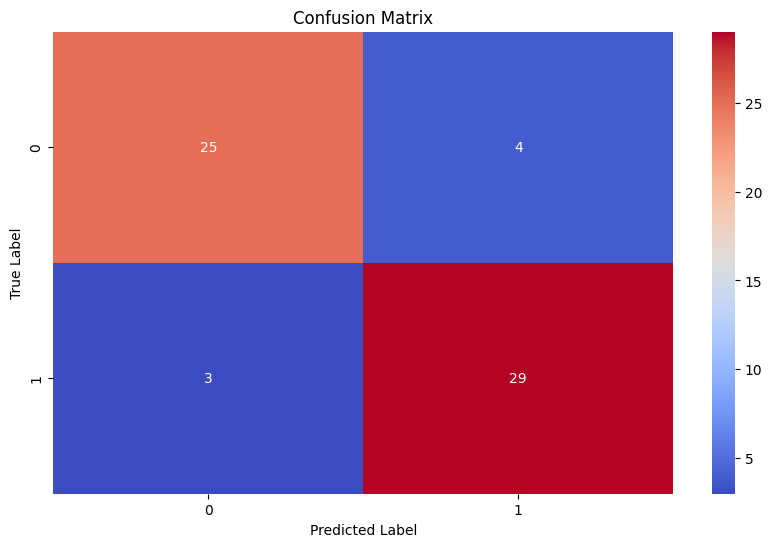

In [96]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [87]:
# Create a classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



* A model that predicts no false positives has a precision score of 1.0
* A model that predicts no false negatives has a recall score of 1.0
* A model that has no false positives and no false negativecs has a f1 score of 1.0

In [98]:
# Calculate eval metrics using cross-validation
cv_acc = cross_val_score(model, X, y, cv=5, scoring='accuracy')
cv_precision = cross_val_score(model, X, y, cv=5, scoring='precision')
cv_recall = cross_val_score(model, X, y, cv=5, scoring='recall')
cv_f1 = cross_val_score(model, X, y, cv=5, scoring='f1')

# Create a DataFrame of the cross-validation scores
cv_metrics = pd.DataFrame({
    'Accuracy': cv_acc.mean(),
    'Precision': cv_precision.mean(),
    'Recall': cv_recall.mean(),
    'F1': cv_f1.mean()
}, index=[0])

cv_metrics

,Accuracy,Precision,Recall,F1
0,0.847978,0.821587,0.927273,0.87054


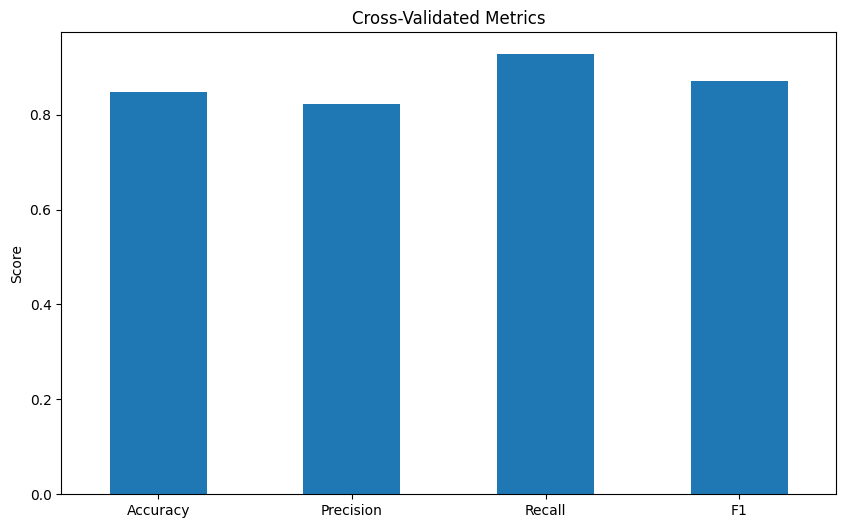

In [102]:
# Plot the cross-validation scores
cv_metrics.T.plot(kind='bar', figsize=(10, 6), legend=False)
plt.title('Cross-Validated Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

In [90]:
# Create a ROC curve
y_probs = model.predict_proba(X_test)
roc_auc_score(y_test, y_probs[:, 1])

0.9245689655172414

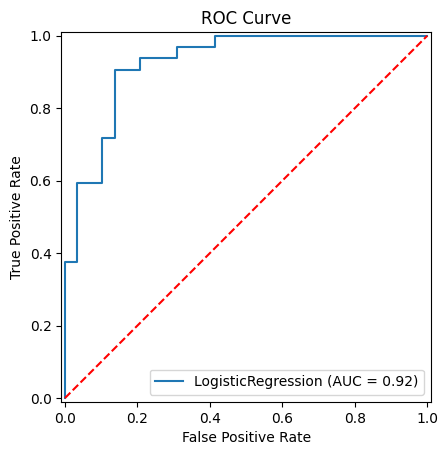

In [94]:
# Plot the ROC curve 
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

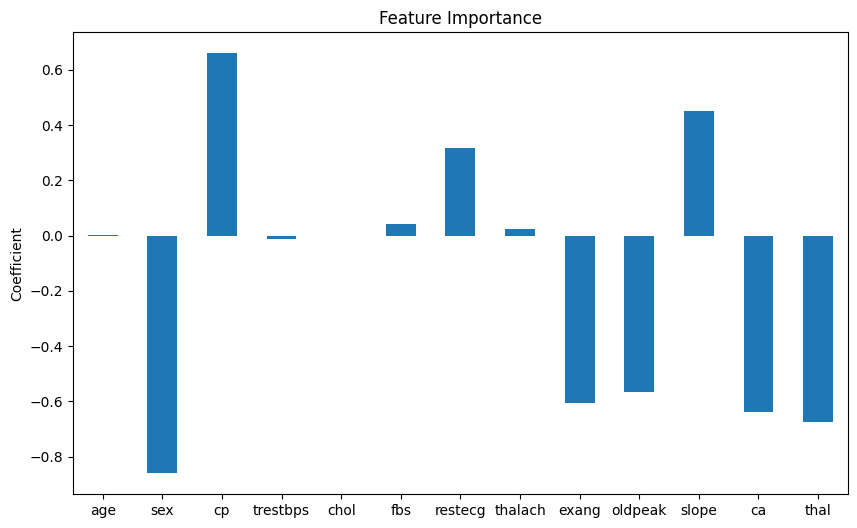

In [103]:
# Check the feature importance of the model
feature_importance = model.coef_

# Create a DataFrame of the feature importance
feature_importance_df = pd.DataFrame(feature_importance, columns=X.columns)

feature_importance_df.T.plot(kind='bar', figsize=(10, 6), legend=False)
plt.title('Feature Importance')
plt.ylabel('Coefficient')
plt.xticks(rotation=0)
plt.show()

We can see that cp, restecg, and slope are the three most important features for our model, while sex and thal are the least important.

In [104]:
# Save the model
import joblib

joblib.dump(model, 'heart-disease-model.joblib')

['heart-disease-model.joblib']

In [105]:
# Load the model
model = joblib.load('heart-disease-model.joblib')

# Make sure the model is working
y_preds = model.predict(X_test)

y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [107]:
# Score the model
model.score(X_test, y_test)

0.8852459016393442

The model was saved and loaded successfully meaning anyone can load in this trained model and make their own predictions with it.

### Conclusion
* After thorough testing and experimentation, we found out that the best model we could use was the Logistic Regression Model. After tuning its hyerparameters, we were able to get an accuracy score of 88.5%, and after cross-validating the data we were able to get a recall score of 92.7%, which means the model does not produce many false positives or false negatives. We also tested area under the curve (AUC) and got a score of 92.4%.
* For our situation, trying to predict whether or not a patient has heart disease, recall and area under the curve have good scores while fitting the situation at hand. Having a high recall score (92.7%) is crucial because the cost of missing a positive case (false negative) is much higher than incorrectly classifying a healthy patient (false negative). Area under the curve is useful as it evaluates the model's overall discrimitative ability, however recall is still the more important metric in this case.
* Our pre-experimentation goal was to get our evaluation metric to have a score of at least 95% and unforunately we were unable to achieve this goal. While 92.7% is a great performing model, if we were to use this in the real world and try to diagnose real patients, we would want the accuracy to be as high as possible as incorrectly classifying an unhealthy patient is a life or death situation.